<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm

In [ ]:
 # change these paths accrodingly
training_dataset = pd.read_excel('/content/drive/MyDrive/Semester 6/ML/Lab 6/TrainingSet.xlsx')
testing_dataset = pd.read_excel('/content/drive/MyDrive/Semester 6/ML/Lab 6/TestingSet.xlsx')

In [ ]:
training_dataset.head()

,leaf.length,leaf.width,flower.length,flower.width,plant
0,5.4,3.7,1.5,0.2,Arctica
1,4.8,3.4,1.6,0.2,Arctica
2,4.8,3.0,1.4,0.1,Arctica
3,4.3,3.0,1.1,0.1,Arctica
4,5.8,4.0,1.2,0.2,Arctica


In [ ]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   leaf.length    120 non-null    float64
 1   leaf.width     120 non-null    float64
 2   flower.length  120 non-null    float64
 3   flower.width   120 non-null    float64
 4   plant          120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [ ]:
X_train =  training_dataset.drop(columns = ['plant'])
y_train =  training_dataset['plant']

X_test = testing_dataset.drop(columns = ['plant'])
y_test = testing_dataset['plant']
print (y_train.unique())

['Arctica' 'Harlequin' 'Carolinian']


In [ ]:
y_train = y_train.map({'Arctica':0,'Harlequin':1,'Carolinian':2})

In [ ]:
X_train.describe()

,leaf.length,leaf.width,flower.length,flower.width
count,120.000000,120.000000,120.000000,120.000000
mean,5.843333,3.061667,3.731667,1.195833
std,0.795020,0.451549,1.742353,0.758747
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
means = X_train.mean(axis = 0)
stds = X_train.std(axis = 0)

In [ ]:
X_train_scaled = (X_train - means) / stds
# Print normalized features
print(X_train_scaled)

     leaf.length  leaf.width  flower.length  flower.width
0      -0.557638    1.413653      -1.280835     -1.312471
1      -1.312337    0.749273      -1.223441     -1.312471
2      -1.312337   -0.136567      -1.338228     -1.444267
3      -1.941252   -0.136567      -1.510409     -1.444267
4      -0.054506    2.078033      -1.453016     -1.312471
..           ...         ...            ...           ...
115     1.077542   -0.136567       0.842730      1.455250
116     0.574409   -1.243867       0.727943      0.928065
117     0.825976   -0.136567       0.842730      1.059862
118     0.448626    0.749273       0.957517      1.455250
119     0.071277   -0.136567       0.785336      0.796269

[120 rows x 4 columns]


In [ ]:
X_test =  testing_dataset.drop(columns = ['plant'])
y_test = testing_dataset['plant']

In [ ]:
X_test_scaled = (X_test - means)/stds
print (X_test_scaled)

print(y_test.unique())

    leaf.length  leaf.width  flower.length  flower.width
0     -1.815469   -0.358027      -1.338228     -1.312471
1     -1.563903    0.084893      -1.280835     -1.312471
2     -1.563903    0.749273      -1.338228     -1.180675
3     -1.438120    0.306353      -1.395622     -1.312471
4     -1.186554   -0.136567      -1.338228     -1.312471
5     -1.186554    0.084893      -1.280835     -1.444267
6     -1.186554   -1.465327      -0.247749     -0.258101
7     -1.186554   -1.243867       0.440974      0.664473
8     -1.060771    1.192193      -1.338228     -1.312471
9     -1.060771    0.749273      -1.280835     -1.312471
10    -0.934988    0.970733      -1.338228     -1.312471
11    -0.809204   -0.800947       0.096613      0.269084
12    -0.557638    1.856573      -1.166047     -1.048879
13    -0.431855   -1.686787       0.154006      0.137288
14    -0.180289   -0.579487       0.440974      0.137288
15    -0.054506   -0.800947       0.785336      0.928065
16     0.574409    0.527813    

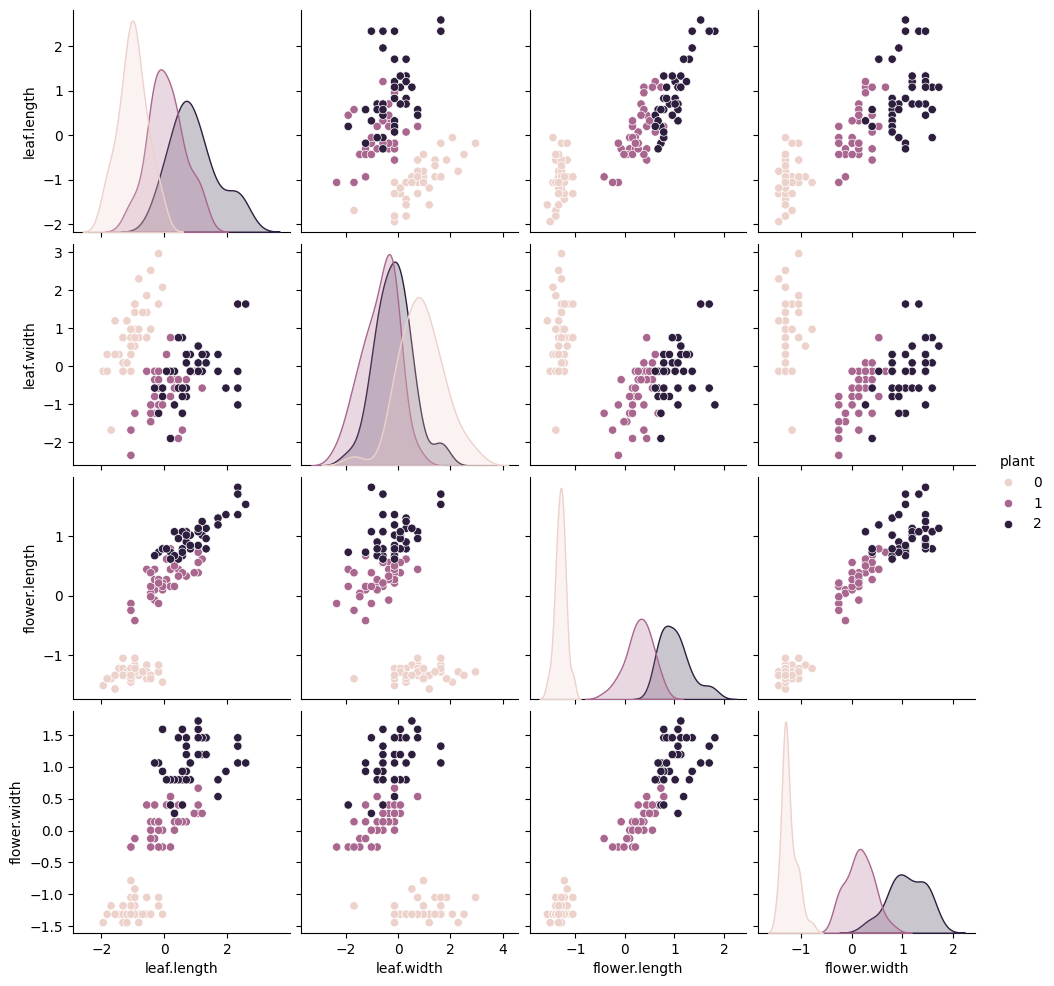

In [ ]:
import seaborn as sns

# Concatenate features and target variable
target_data = pd.concat([X_train_scaled, y_train], axis=1)

# Create pair plot
sns.pairplot(target_data, hue='plant', diag_kind='kde')

In [ ]:
n_folds = 10
test_idx = [8,9]

In [ ]:
def k_fold(data, n_folds):
    folded_data = []
    n_per_fold = len(data) // n_folds

    for fold_count in range(n_folds):
        start_idx = fold_count * n_per_fold
        end_idx = (fold_count + 1) * n_per_fold
        fold = data[start_idx:end_idx]
        folded_data.append(fold)

    return folded_data


In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [ ]:
classifier = svm.SVC(kernel='linear', C=1)

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(X_train_scaled)):
    X_train_folded_train = X_train_scaled.iloc[train_index].to_numpy()
    X_train_folded_test = X_train_scaled.iloc[test_index].to_numpy()

    y_train_folded_train = y_train.iloc[train_index].to_numpy()
    y_train_folded_test = y_train.iloc[test_index].to_numpy()

    classifier.fit(X_train_folded_train, y_train_folded_train)

    accuracy = classifier.score(X_train_folded_test, y_train_folded_test)


In [ ]:
accuracy # due to very small dataset it can easily overfit

1.0

In [ ]:
y_test = classifier.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2])

In [ ]:
y_test = pd.Series(y_test)

# Map the predicted y_test values
y_test = y_test.map({0: 'Arctica', 1: 'Harlequin', 2: 'Carolinian'})


In [ ]:
testing_dataset['plant'] = y_test

# Save the updated DataFrame back to the same Excel file
testing_dataset.to_excel('/content/drive/MyDrive/Semester 6/ML/Lab 6/TestingSet.xlsx', index=False)


In [ ]:
# Count the occurrences of each unique value
counts = testing_dataset['plant'].value_counts()
print("Counts of each lables:")
print(counts)

Counts of each lables:
plant
Harlequin     11
Arctica       10
Carolinian     9
Name: count, dtype: int64


the file is saved in drive and we will have to download it from there

### THE END